File read successfully! Total rows: 18200
Running data insight analysis...


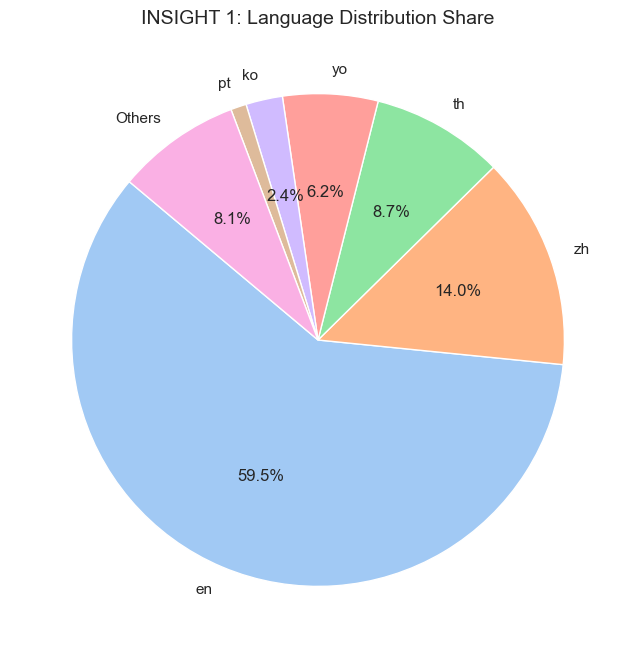

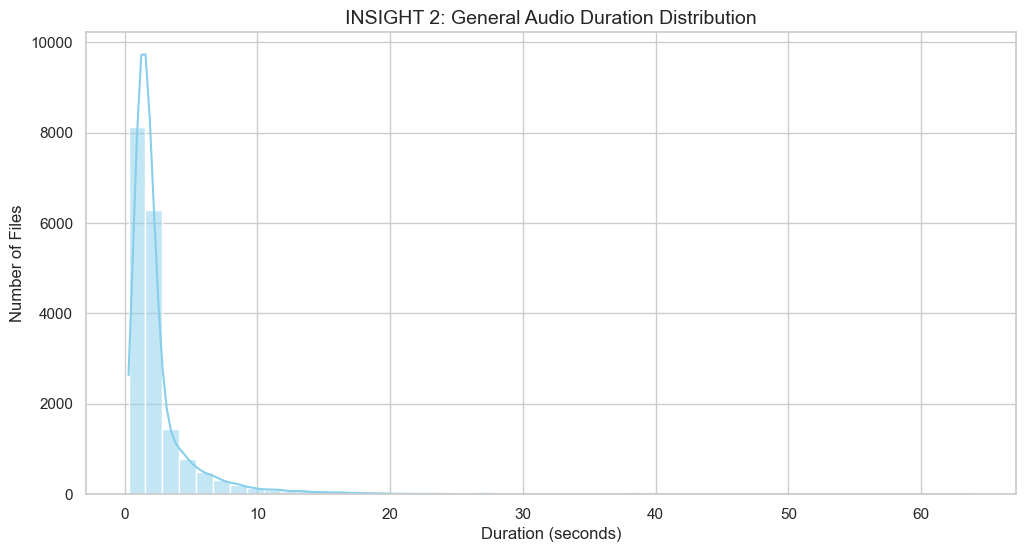

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15048\75326541.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='cool')


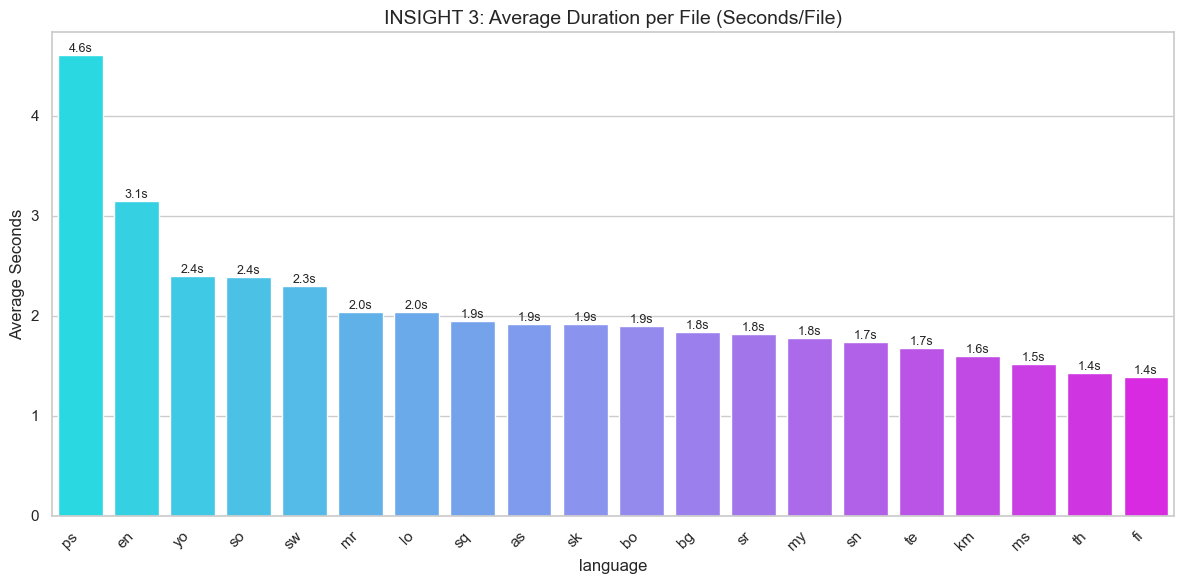

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15048\75326541.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=spk_counts.index, y=spk_counts.values, palette='coolwarm')


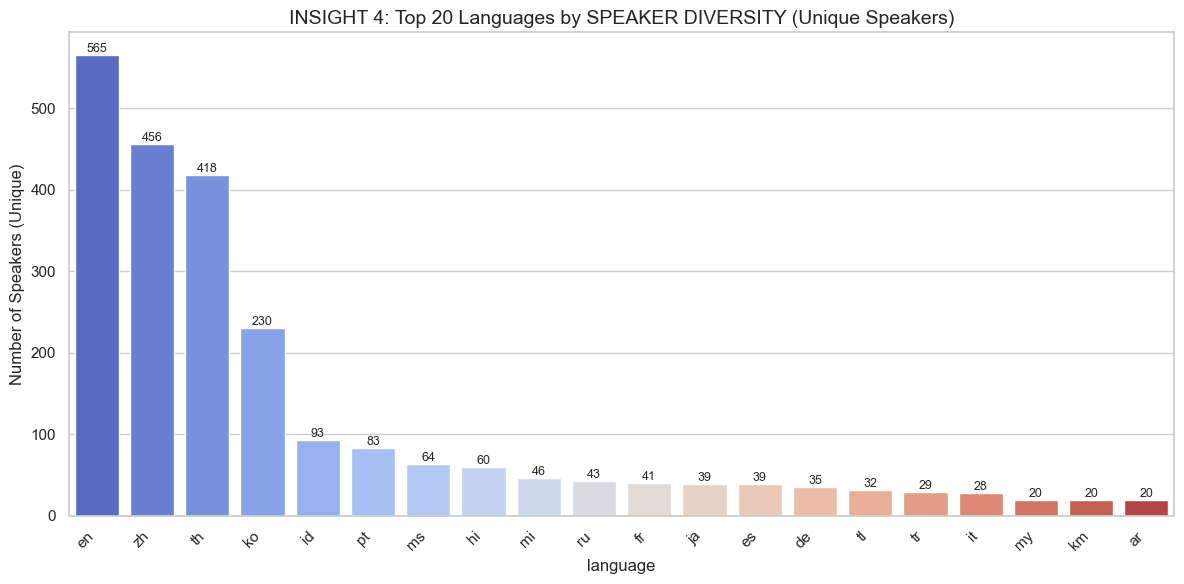

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15048\75326541.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_speakers.index, y=top_speakers.values, palette='rocket')


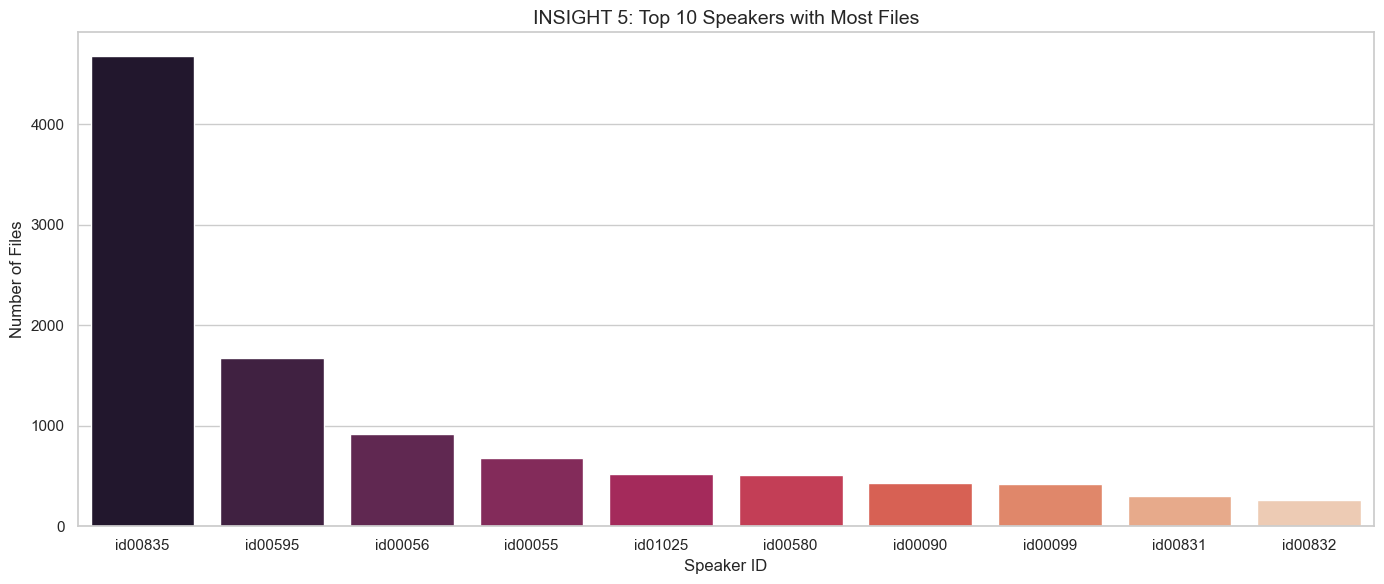


DATA INSIGHT SUMMARY REPORT
1. Scale: 12.48 hours - 18200 files.
2. Duration: Min 0.29s - Max 63.98s - Mean 2.47s
3. Speakers: 998 unique speakers.

Completed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =============================================================================
# 1. CONFIGURATION & DATA LOADING
# =============================================================================
file_path = r'D:\Study\7-SP26\DATxSLP\metadata_other_languages.csv'

try:
    df = pd.read_csv(file_path)
    print(f"File read successfully! Total rows: {len(df)}")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

sns.set(style="whitegrid")

# =============================================================================
# 2. INSIGHT PLOTTING FUNCTIONS
# =============================================================================

def plot_insight_language_share(df):
    """Insight 1: Language Share (Market Share)"""
    plt.figure(figsize=(10, 8))
    top_n = 6
    lang_counts = df['language'].value_counts()
    top_langs = lang_counts.head(top_n)
    other_count = lang_counts.iloc[top_n:].sum()
    
    if other_count > 0:
        plot_data = pd.concat([top_langs, pd.Series({'Others': other_count})])
    else:
        plot_data = top_langs

    colors = sns.color_palette('pastel')
    autopct = lambda pct: f'{pct:.1f}%' if pct > 2 else ''
    
    plt.pie(plot_data, labels=plot_data.index, autopct=autopct, startangle=140, colors=colors)
    plt.title('INSIGHT 1: Language Distribution Share', fontsize=14)
    plt.show()

def plot_general_duration_distribution(df):
    """Insight 2: General Audio Duration Distribution"""
    plt.figure(figsize=(12, 6))
    sns.histplot(df['duration'], kde=True, bins=50, color='skyblue')
    plt.title('INSIGHT 2: General Audio Duration Distribution', fontsize=14)
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Number of Files')
    plt.show()

def plot_insight_avg_duration(df):
    """Insight 3: Average Duration per File by Language"""
    plt.figure(figsize=(12, 6))
    avg_duration = df.groupby('language')['duration'].mean().sort_values(ascending=False).head(20)
    
    ax = sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='cool')
    plt.title('INSIGHT 3: Average Duration per File (Seconds/File)', fontsize=14)
    plt.ylabel('Average Seconds')
    plt.xticks(rotation=45, ha='right')
    
    for i, v in enumerate(avg_duration.values):
        ax.text(i, v, f'{v:.1f}s', ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

def plot_speaker_diversity(df):
    """Insight 4: Unique Speakers per Language"""
    plt.figure(figsize=(12, 6))
    # Count unique speakers per language
    spk_counts = df.groupby('language')['id_speaker'].nunique().sort_values(ascending=False).head(20)
    
    ax = sns.barplot(x=spk_counts.index, y=spk_counts.values, palette='coolwarm')
    plt.title(f'INSIGHT 4: Top 20 Languages by SPEAKER DIVERSITY (Unique Speakers)', fontsize=14)
    plt.ylabel('Number of Speakers (Unique)')
    plt.xticks(rotation=45, ha='right')
    
    for i, v in enumerate(spk_counts.values):
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

def plot_top_speakers(df):
    """Insight 5: Top 10 Speakers with Most Files"""
    plt.figure(figsize=(14, 6))
    top_speakers = df['id_speaker'].value_counts().head(10)
    sns.barplot(x=top_speakers.index, y=top_speakers.values, palette='rocket')
    
    plt.title('INSIGHT 5: Top 10 Speakers with Most Files', fontsize=14)
    plt.xlabel('Speaker ID')
    plt.ylabel('Number of Files')
    plt.tight_layout()
    plt.show()

def print_text_summary(df):
    """Text Summary of Insights"""
    print("\n" + "="*40)
    print("DATA INSIGHT SUMMARY REPORT")
    print("="*40)
    
    total_hours = df['duration'].sum() / 3600
    print(f"1. Scale: {total_hours:.2f} hours - {len(df)} files.")
    print(f"2. Duration: Min {df['duration'].min():.2f}s - Max {df['duration'].max():.2f}s - Mean {df['duration'].mean():.2f}s")
    print(f"3. Speakers: {df['id_speaker'].nunique()} unique speakers.")

# =============================================================================
# 3. EXECUTION
# =============================================================================

print("Running data insight analysis...")

# 1. Language
plot_insight_language_share(df)

# 2. Duration
plot_general_duration_distribution(df)
plot_insight_avg_duration(df)

# 3. Speakers
plot_speaker_diversity(df) 
plot_top_speakers(df)

# 4. Text Report
print_text_summary(df)

print("\nCompleted.")